In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
tickers = ['NVDA', "AAPL", "ADBE"] 

In [67]:
data = yf.download(tickers, start="2020-01-01", end="2024-11-19") 

[*********************100%%**********************]  3 of 3 completed


In [68]:
adj_close = data['Adj Close']
adj_close.head()

Ticker,AAPL,ADBE,NVDA
Date,,,
2020-01-02,72.796028,334.429993,5.973121
2020-01-03,72.088287,331.809998,5.877517
2020-01-06,72.662704,333.709991,5.902165
2020-01-07,72.320969,333.390015,5.973619
2020-01-08,73.484360,337.869995,5.984823


In [69]:
returns = adj_close.pct_change().dropna()

In [70]:
returns= pd.DataFrame(returns)
returns.head()

Ticker,AAPL,ADBE,NVDA
Date,,,
2020-01-03,-0.009722,-0.007834,-0.016006
2020-01-06,0.007968,0.005726,0.004194
2020-01-07,-0.004703,-0.000959,0.012106
2020-01-08,0.016086,0.013438,0.001876
2020-01-09,0.021241,0.007636,0.010983


<Figure size 1800x800 with 0 Axes>

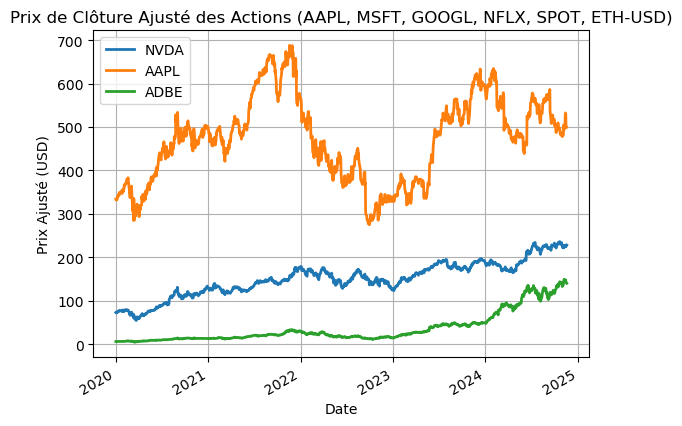

In [71]:
# Étape 7: Tracer les graphiques des prix ajustés
plt.figure(figsize=(18, 8))
adj_close.plot(title='Prix de Clôture Ajusté des Actions (AAPL, MSFT, GOOGL, NFLX, SPOT, ETH-USD)', lw=2)
plt.xlabel('Date')
plt.ylabel('Prix Ajusté (USD)')
plt.legend(tickers, loc='upper left')
plt.grid(True)
plt.show()

<Figure size 1800x800 with 0 Axes>

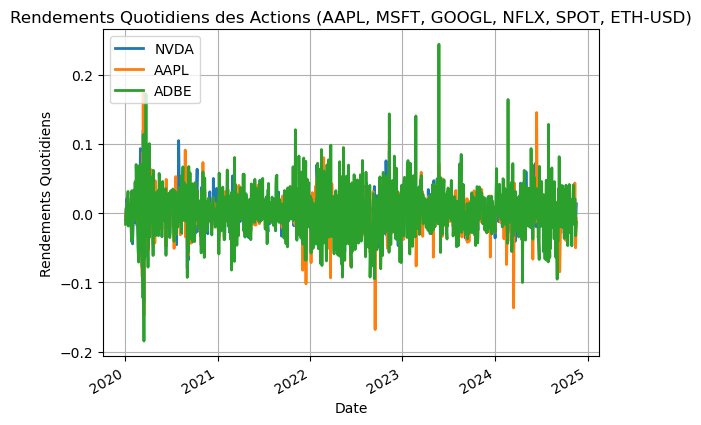

In [72]:
plt.figure(figsize=(18, 8))
returns.plot(title='Rendements Quotidiens des Actions (AAPL, MSFT, GOOGL, NFLX, SPOT, ETH-USD)', lw=2)
plt.xlabel('Date')
plt.ylabel('Rendements Quotidiens')
plt.legend(tickers, loc='upper left')
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     545.5
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          3.89e-170
Time:                        20:07:45   Log-Likelihood:                 2795.7
No. Observations:                1228   AIC:                            -5585.
Df Residuals:                    1225   BIC:                            -5570.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      2.971      0.0

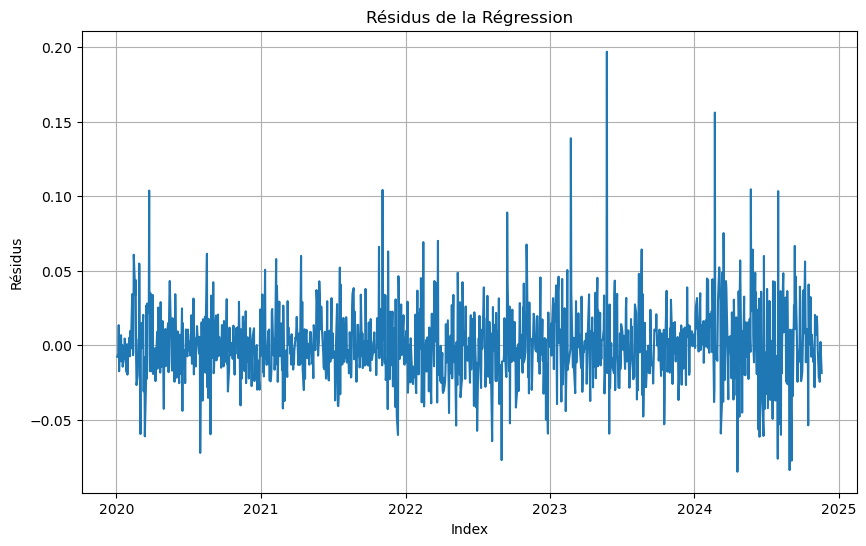

In [73]:
# Importer les bibliothèques nécessaires

import statsmodels.api as sm
# Séparer la variable dépendante (ETH-USD) et les variables indépendantes (autres tickers)
y = returns['NVDA']  # La variable cible (ETH-USD)
X = returns.drop(columns=['NVDA'])  # Les autres tickers

# Ajouter une constante pour l'interception dans le modèle
X = sm.add_constant(X)

#Estimer le modèle de régression linéaire
model = sm.OLS(y, X).fit()

#Afficher les résultats de la régression
print(model.summary())

# Étape 9: Tracer les résidus pour vérifier l'hypothèse des erreurs indépendantes et identiquement distribuées (i.i.d)
plt.figure(figsize=(10, 6))
plt.plot(model.resid)
plt.title('Résidus de la Régression')
plt.xlabel('Index')
plt.ylabel('Résidus')
plt.grid(True)
plt.show()